In [1]:
import functions as utils
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import t

### 4. Weak Instruments


In [2]:
n = 10000
β = 1 
π = 1

b = np.empty(0)
V = np.empty(0)
for i in range(1000):
    x, y, Z = utils.dgp(n, β, π)
    tmpb, tmpV = utils.two_sls(x, y, Z)
    b = np.append(b, np.squeeze(tmpb))
    V = np.append(V, np.squeeze(tmpV))
se = np.sqrt(V)

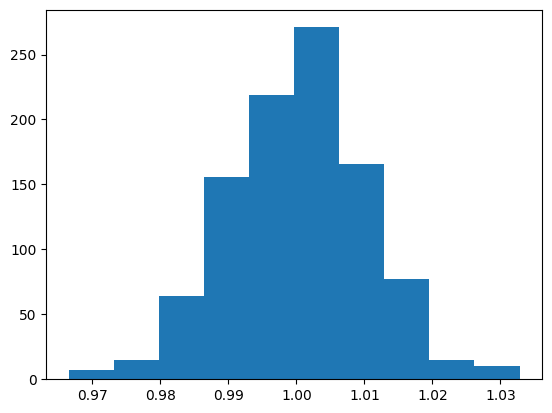

In [3]:
plt.hist(b)
plt.show()

In [4]:
##  Calculate size and power of t - test 
tscore = utils.ttest(b, se)
df = n - 1
p = t.sf(abs(tscore), df = df)*2
power = 1 - p


##### 4.2.c

In [5]:
## Now get an estimate of beta(pi) for 20 different pi ranging from 0 to 1
pi = np.linspace(0.01,1,20)
b = np.empty(0)
V = np.empty(0)
for coef in pi: 
    x, y, Z = utils.dgp(n, β, coef)
    tmpb, tmpV = utils.two_sls(x, y, Z)
    b = np.append(b, np.squeeze(tmpb))
    V = np.append(V, np.squeeze(tmpV))
se = np.sqrt(V)

Text(0.5, 1.0, 'Effect of pi on estimate of beta with 95% confidence interval')

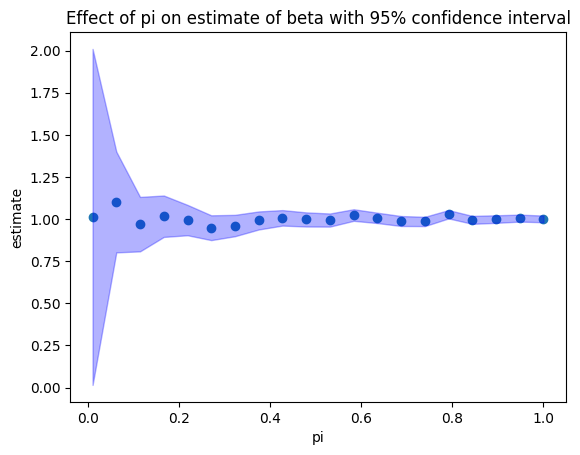

In [6]:
conf = se*2
fig, ax = plt.subplots() 
ax.scatter(pi, b)
ax.fill_between(pi, (b + conf), (b- conf), color='blue', alpha=0.3)
ax.set_xlabel('pi')
ax.set_ylabel('estimate')
ax.set_title("Effect of pi on estimate of beta with 95% confidence interval")

##### 4.3.a

In [7]:
n = 1000
β = 1
b = np.empty(0)
V = np.empty(0)
L = range(1, 50)
for l in L: 
    pi = np.array([(.5)**(x) for x in range(l)])
    x, y, Z = utils.dgp(n, β, pi)
    tmpb, tmpV = utils.two_sls(x, y, Z)
    b = np.append(b, np.squeeze(tmpb))
    V = np.append(V, np.squeeze(tmpV))
se = np.sqrt(V)

Text(0.5, 1.0, 'Higher l = successively weak instruments')

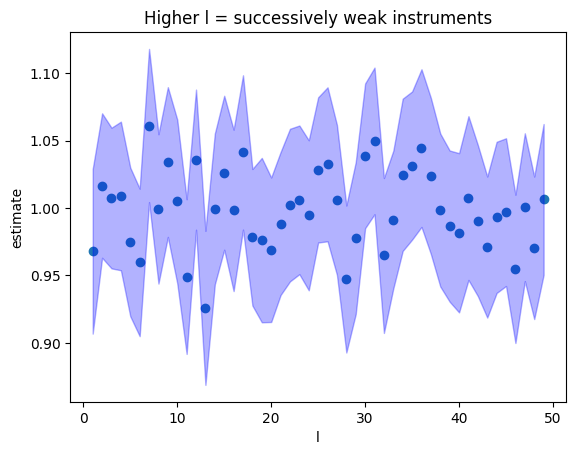

In [8]:
conf = se*2
fig, ax = plt.subplots() 
ax.scatter(L, b)
ax.fill_between(L, (b + conf), (b- conf), color='blue', alpha=0.3)
ax.set_xlabel('l')
ax.set_ylabel('estimate')
ax.set_title("Higher l = successively weak instruments")

### 5. A Simple Approach to Inference with Weak Instruments

Text(0, 0.5, 'p-val')

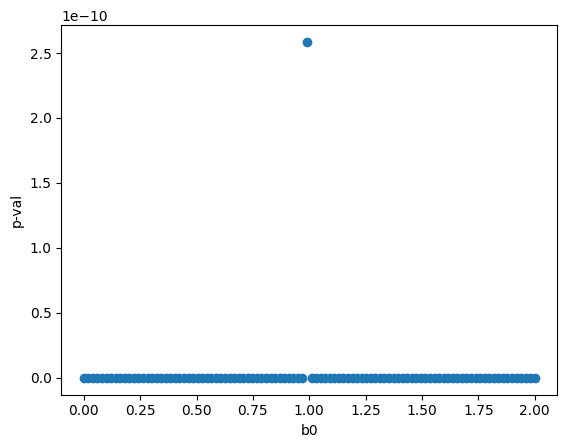

In [9]:
n = 1000
β = 1 
π = 1
x, y, Z = utils.dgp(n, β, π)

b0 = np.linspace(0.8, 1.2, 100)
p = np.array([utils.hansen(x, y, Z, b) for b in b0])

fig, ax = plt.subplots() 
ax.scatter(b0, p)
ax.set_xlabel('b0')
ax.set_ylabel('p-val')
